> You can read about Burgers' Equation on its [wikipedia page](https://en.wikipedia.org/wiki/Burgers'_equation).

您可以在其[维基百科](https://en.wikipedia.org/wiki/Burgers'_equation)页面上阅读有关 Burgers 方程的信息

> Burgers' equation in one spatial dimension looks like this:

Burgers 的一维空间方程如下所示：

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = v \frac{\partial ^2 u}{\partial x^2}$$

> As you can see, it is a combination of non-linear convection and diffusion. It is surprising how much you learn from this neat little equation!

如您所见，它是非线性对流和扩散的组合。令人惊讶的是，您从这个简洁的小方程式中学到了多少！

> We can discretize it using the methods we've already detailed in Steps 1 to 3. Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

我们可以使用我们在步骤 1 到 3 中已经详述的方法对其进行离散化。使用时间的前向差分、空间的后向差分和我们的二阶导数的二阶方法得出：

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^{n}}{\Delta x} = v \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

> As before, once we have an initial condition, the only unknown is $u^{n+1}_i$. We will step in time as follows:

和以前一样，一旦我们有了初始条件，唯一的未知数就是$u^{n+1}_i$。我们将按以下方式进行时间步进。

$$u^{n+1}_i = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n) + v\frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

### Initial and Boundary Conditions \ 初始和边界条件

> To examine some interesting properties of Burgers' equation, it is helpful to use different initial and boundary conditions than we've been using for previous steps.

为了研究伯格斯方程的一些有趣的特性，使用与我们在以前的步骤中使用的不同的初始和边界条件是有帮助的。

> Our initial condition for this problem is going to be:

我们对这个问题的初始条件为：

$$u = - \frac{2v}{\phi} \frac{\partial \phi}{\partial x} + 4 \tag{1}$$

$$\phi = \text{exp} \Big( \frac{-x^2}{4v} \Big) + \text{exp} \Big( \frac{-(x-2\pi)^2}{4v} \Big) \tag{2}$$

> This has an analytical solution, given by:

这里有一个解析解，可由一下公式给出

$$ u = -\frac{2v}{\phi}\frac{\partial \phi}{\partial x} + 4 \tag{3}$$

$$ \phi = \text{exp} \Big( \frac{-(x-4t)^2}{4v(t+1)} \Big) + \text{exp} \Big( \frac{-(x-4t-2\pi)^2}{4v(t+1)} \Big) \tag{4}$$

> Our boundary condition will be:

我们的边界条件为：

$$u(0) = u(2\pi)$$

> This is called a periodic boundary condition. Pay attention! This will cause you a bit of headache if you don't tread carefully.

这被称为周期性边界条件。请注意! 如果你不够小心，这将使你有点头疼。

### Saving Time with SymPy / 使用SymPy节省时间

> The initial condition we're using for Burgers' Equation can be a bit of a pain to evaluate by hand. The derivative $\frac{\partial \phi}{\partial x}$ isn't too terribly difficult, but it would be easy to drop a sign or forget a factor of $x$ somewhere, so we're going to use SymPy to help us out.

我们在伯格斯方程中使用的初始条件，直接估算可能有点麻烦。导数 $\frac{\partial\phi}{\partial x}$ 并不难，但很容易在某处丢掉一个符号或忘记$x$的一个因子，所以我们要用SymPy来帮助我们解决。

> SymPy is the symbolic math library for Python. It has a lot of the same symbolic math functionality as Mathematica with the added benefit that we can easily translate its results back into our Python calculations (it is also free and open source).

SymPy是Python的符号数学库，它有很多与Mathematica相同的符号数学功能，还有一个好处是我们可以很容易地把它的结果转化回我们的Python计算中（它也是免费和开源的）。

> Start by loading the SymPy library, together with our favorite library, NumPy.

首先加载SymPy库，以及我们最喜欢的库NumPy。

In [1]:
import numpy
import sympy

> We're also going to tell SymPy that we want all of its output to be rendered using LATEX. This will make our Notebook beautiful!

我们还将告诉SymPy，我们希望它的所有输出都用LATEX来呈现。这将使我们的笔记本变得漂亮

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

> Start by setting up symbolic variables for the three variables in our initial condition and then type out the full equation for $\phi$. We should get a nicely rendered version of our $\phi$ equation.

首先为初始条件中的三个变量设置符号变量，然后打出$phi$的完整方程。我们应该得到一个漂亮的$phi$方程的渲染版本。

In [3]:
x,nu,t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t) ** 2 / (4 * nu * (t + 1)))) + sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1)))
phi

> It's maybe a little small, but that looks right. Now to evaluate our partial derivative $\frac{\partial \phi}{\partial x}$ is a trivial task.

它可能有点小，但看起来是对的。现在估算我们的偏导$\frac{\partial\phi}{\partial x}$是一个微不足道的任务。

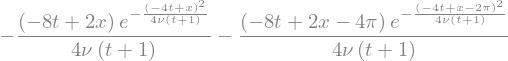

In [4]:
phiprime = phi.diff(x)
phiprime

> If you want to see the unrendered version, just use the Python print command.

如果你想看未渲染的版本，只需使用Python打印命令。

In [5]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


### Now what? / 之后呢？

> Now that we have the Pythonic version of our derivative, we can finish writing out the full initial condition equation and then translate it into a usable Python expression. For this, we'll use the lambdify function, which takes a SymPy symbolic equation and turns it into a callable function.

现在我们有了导数的Pythonic版本，我们可以完成写出完整的初始条件方程，然后把它翻译成可用的Python表达式。为此，我们将使用lambdify函数，它接收一个SymPy符号方程并把它变成一个可调用的函数。

In [7]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


### Lambdify

> To lambdify this expression into a useable function, we tell lambdify which variables to request and the function we want to plug them in to.

为了把这个表达式变成一个可用的函数，我们告诉lambdify要请求哪些变量，以及我们要把它们插入的函数。

In [8]:
ufunc = lambdify((t,x,nu),u)
print(ufunc(1,4,3))

3.49170664206445


### Back to Burgers' Equation / 回到伯格斯方程

> Now that we have the initial conditions set up, we can proceed and finish setting up the problem. We can generate the plot of the initial condition using our lambdify-ed function.

现在我们已经设置了初始条件，我们可以继续并完成问题的设置。我们可以用我们的lambdify-ed函数生成初始条件的图。

In [10]:
from matplotlib import pyplot
%matplotlib inline

###variable declarations/变量声明
nx = 101
nt = 100
dx = 2 * numpy.pi / (nx - 1)
nu = 0.07
dt = dx * nu

x = numpy.linspace(0,2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

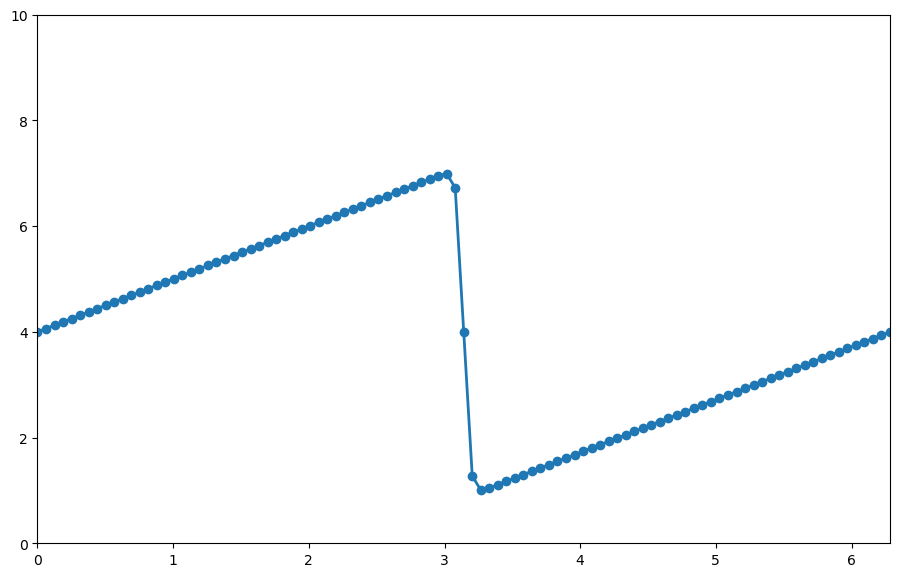

In [11]:
pyplot.figure(figsize=(11,7),dpi=100)
pyplot.plot(x,u,marker='o',lw=2)
pyplot.xlim([0,2 * numpy.pi])
pyplot.ylim([0,10]);

> This is definitely not the hat function we've been dealing with until now. We call it a "saw-tooth function". Let's proceed forward and see what happens.

这绝对不是我们到目前为止一直在处理的帽子函数。我们称它为 "锯齿形函数"。让我们继续前进，看看会发生什么。

### Periodic Boundary Conditions / 周期性的边界件

> One of the big differences between Step 4 and the previous lessons is the use of periodic boundary conditions. If you experiment with Steps 1 and 2 and make the simulation run longer (by increasing $nt$) you will notice that the wave will keep moving to the right until it no longer even shows up in the plot.

第4步和之前的课程之间的一个很大的区别是使用了周期性的边界条件。如果你对步骤1和2进行实验，并使模拟运行时间更长（通过增加 $nt$），你会注意到波会不断向右移动，直到它甚至不再显示在图中。

> With periodic boundary conditions, when a point gets to the right-hand side of the frame, it wraps around back to the front of the frame.

> Recall the discretization that we worked out at the beginning of this notebook: